In [32]:
import pandas as pd
from tqdm import tqdm


In [13]:
train_df = pd.read_csv("G:\My Drive\Datasets/bandwidth/train (1).csv")
train_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\duclh5\AppData\Local\Temp\ipykernel_36896\2385718269.py:1: SyntaxWarning: invalid escape sequence '\M'
  train_df = pd.read_csv("G:\My Drive\Datasets/bandwidth/train (1).csv")


,UPDATE_TIME,ZONE_CODE,HOUR_ID,BANDWIDTH_TOTAL,MAX_USER
0,2017-10-01,ZONE01,0,16096.710313,212415.0
1,2017-10-01,ZONE01,1,9374.207907,166362.0
2,2017-10-01,ZONE01,2,5606.225750,146370.0
3,2017-10-01,ZONE01,3,4155.654661,141270.0
4,2017-10-01,ZONE01,4,3253.978594,139689.0


In [14]:
train_df.drop_duplicates(inplace=True)


In [72]:
ZONE_1_df = train_df[train_df['ZONE_CODE'] == 'ZONE01']
ZONE_1_df.shape

(12575, 5)

In [73]:
min_date = pd.to_datetime(ZONE_1_df['UPDATE_TIME'].min())
max_date = pd.to_datetime(ZONE_1_df['UPDATE_TIME'].max())

dates = pd.date_range(start=min_date, end=max_date+pd.Timedelta(hours=23), freq='h')
full_time = pd.DataFrame({
    'UPDATE_TIME': [d.date() for d in dates],
    'HOUR_ID': [d.hour for d in dates]
})

In [ ]:
ZONE_1_df['UPDATE_TIME'] = pd.to_datetime(ZONE_1_df['UPDATE_TIME']).dt.date
merged_df = pd.merge(full_time, ZONE_1_df, on=['UPDATE_TIME', 'HOUR_ID'], how='left')
merged_df.head()


C:\Users\duclh5\AppData\Local\Temp\ipykernel_36896\1882629144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ZONE_1_df['UPDATE_TIME'] = pd.to_datetime(ZONE_1_df['UPDATE_TIME']).dt.date


,UPDATE_TIME,HOUR_ID,ZONE_CODE,BANDWIDTH_TOTAL,MAX_USER
0,2017-10-01,0,ZONE01,16096.710313,212415.0
1,2017-10-01,1,ZONE01,9374.207907,166362.0
2,2017-10-01,2,ZONE01,5606.225750,146370.0
3,2017-10-01,3,ZONE01,4155.654661,141270.0
4,2017-10-01,4,ZONE01,3253.978594,139689.0


In [80]:
merged_df['UPDATE_TIME'] = pd.to_datetime(merged_df['UPDATE_TIME'])

In [81]:
train = merged_df[merged_df['UPDATE_TIME'] < pd.to_datetime('2019-01-01')]
valid = merged_df[merged_df['UPDATE_TIME'] >= pd.to_datetime('2019-01-01')]
print(valid.shape)
valid = valid[~valid['BANDWIDTH_TOTAL'].isnull()]
print(valid.shape)

(1632, 5)
(1631, 5)


In [83]:
train['BANDWIDTH_TOTAL'] = train['BANDWIDTH_TOTAL'].fillna(0)

C:\Users\duclh5\AppData\Local\Temp\ipykernel_36896\393242851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['BANDWIDTH_TOTAL'] = train['BANDWIDTH_TOTAL'].fillna(0)


In [86]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns


<Axes: xlabel='UPDATE_TIME', ylabel='BANDWIDTH_TOTAL'>

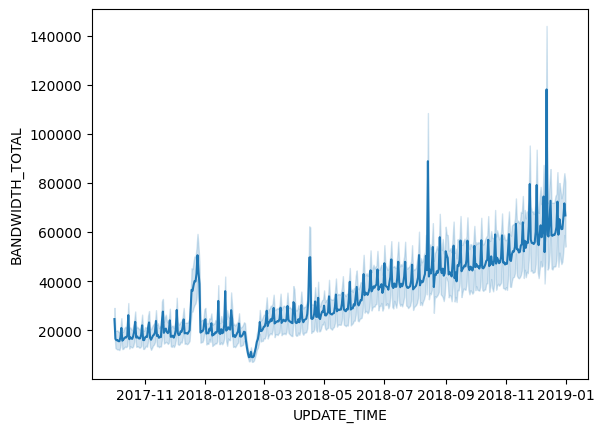

In [88]:
sns.lineplot(x='UPDATE_TIME', y='BANDWIDTH_TOTAL', data=train)


In [ ]:
model = SARIMAX(train['BANDWIDTH_TOTAL'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
model_fit = model.fit()

d:\Vendors\miniconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
train.tail(10)